,area_km,cells,cls_km,res,spacing_km
0,5.100656e+07,12.0,8199.500370,0.0,7053.652431
1,1.700219e+07,32.0,4678.969872,1.0,4072.428130
2,5.667396e+06,92.0,2691.252071,2.0,2351.217477
3,1.889132e+06,272.0,1551.867549,3.0,1357.476043
4,6.297106e+05,812.0,895.601842,4.0,783.739159
5,2.099035e+05,2432.0,517.004997,5.0,452.492014


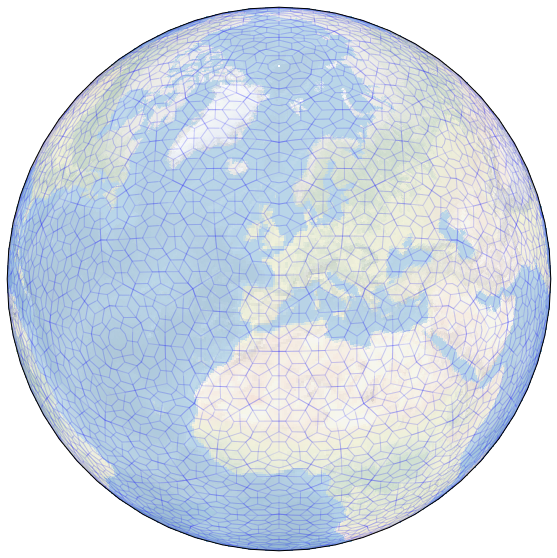

In [1]:
import dggridpy as dg
import numpy as np
#from shapely.geometry import Polygon , mapping
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  


maxreslevel = 6
density = 10
aperture = 3
net0 = dg.DgRFNetwork()
geoRF = dg.DgGeoSphRF(net0, "GS0");
vert0 = dg.DgGeoCoord(0, 90, False)
azimuth = 0.0
dggs3h = dg.DgIDGGS43H(net0, geoRF, vert0, azimuth, 10, "ISEA3H","ISEA")
dggs_res = dg.dggetres(aperture,dg.TopologyType.HEXAGON,dg.ProjectionType.ISEA,maxreslevel)

dggs_df = pd.DataFrame.from_dict(dggs_res, orient='index')
display(dggs_df)

plt.close()
plt.figure(1,figsize=(10,10))
fig = plt.gcf()    

for reslevel , data in dggs_res.items():
    dggs3hres = dggs3h.idgg(reslevel)
    ax = plt.subplot(1 , 1 , 1 , projection=ccrs.NearsidePerspective(central_longitude=0 , central_latitude =45))
    ax.set_global()
    for cell in np.arange(0,int(data['cells'])+1):
        mpoly = mpatches.Polygon(
            xy=dggs3hres.getVertices(cell,density-reslevel), 
            closed=False , 
            facecolor="white",
            edgecolor="blue",
            alpha=0.1,
            animated=True,
            linewidth=1,
            transform=ccrs.Geodetic())            
        ax.add_patch(mpoly)            
        
ax.stock_img()
plt.savefig('image/ISEA3H.png')
plt.show()    


,area_km,cells,cls_km,res,spacing_km
0,5.100656e+07,12.0,8199.500370,0.0,7053.652431
1,1.275164e+07,42.0,4046.359551,1.0,3526.826216
2,3.187910e+06,162.0,2016.793927,2.0,1763.413108
3,7.969775e+05,642.0,1007.607198,3.0,881.706554
4,1.992444e+05,2562.0,503.705139,4.0,440.853277
5,4.981110e+04,10242.0,251.840270,5.0,220.426638


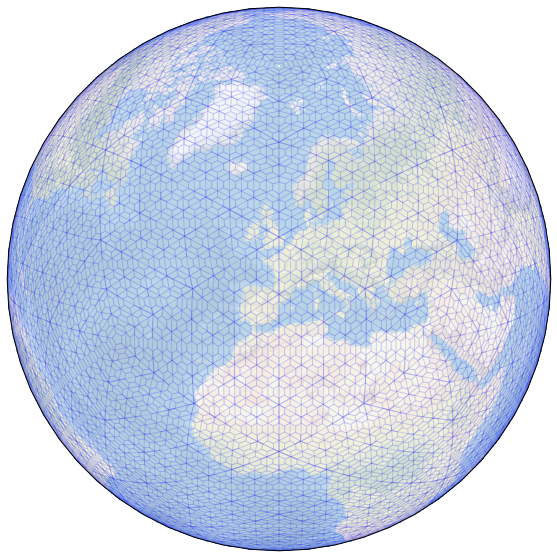

In [2]:
aperture = 4
dggs4h = dg.DgIDGGS4H(net0, geoRF, vert0, azimuth, 10, "ISEA4H","ISEA")
dggs_res = dg.dggetres(aperture,dg.TopologyType.HEXAGON,dg.ProjectionType.ISEA,maxreslevel)

dggs_df = pd.DataFrame.from_dict(dggs_res, orient='index')
display(dggs_df)

plt.close()
plt.figure(1,figsize=(10,10))
fig = plt.gcf()    

for reslevel , data in dggs_res.items():
    dggs4hres = dggs4h.idgg(reslevel)
    ax = plt.subplot(1 , 1 , 1 , projection=ccrs.NearsidePerspective(central_longitude=0 , central_latitude =45))
    ax.set_global()
    for cell in np.arange(0,int(data['cells'])+1):
        mpoly = mpatches.Polygon(
            xy=dggs4hres.getVertices(cell,density-reslevel), 
            closed=False , 
            facecolor="white",
            edgecolor="blue",
            alpha=0.1,
            animated=True,
            linewidth=1,
            transform=ccrs.Geodetic())            
        ax.add_patch(mpoly)            
ax.stock_img()
plt.savefig('image/ISEA4H.png')
plt.show()  

,area_km,cells,cls_km,res,spacing_km
0,5.100656e+07,10.0,8199.500370,0.0,7053.652431
1,1.275164e+07,40.0,4046.359551,1.0,3526.826216
2,3.187910e+06,160.0,2016.793927,2.0,1763.413108
3,7.969775e+05,640.0,1007.607198,3.0,881.706554
4,1.992444e+05,2560.0,503.705139,4.0,440.853277
5,4.981110e+04,10240.0,251.840270,5.0,220.426638


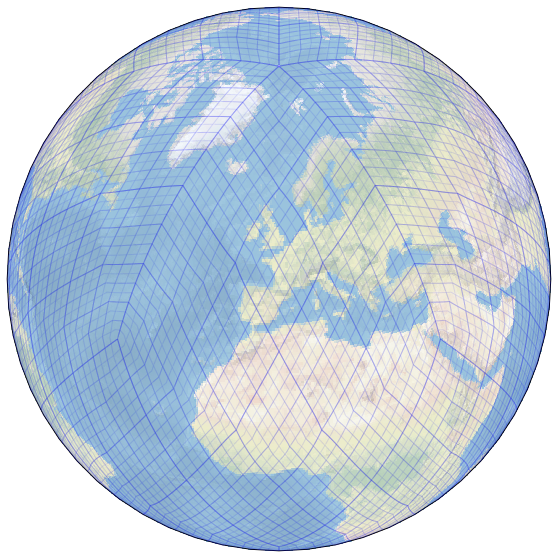

In [3]:
aperture = 4
dggs4d = dg.DgIDGGS4D(net0, geoRF, vert0, azimuth, 10, "ISEA4D","ISEA")
dggs_res = dg.dggetres(aperture,dg.TopologyType.DIAMOND,dg.ProjectionType.ISEA,maxreslevel)

dggs_df = pd.DataFrame.from_dict(dggs_res, orient='index')
display(dggs_df)

plt.close()
plt.figure(1,figsize=(10,10))
fig = plt.gcf()    

for reslevel , data in dggs_res.items():
    dggs4dres = dggs4d.idgg(reslevel)
    ax = plt.subplot(1 , 1 , 1 , projection=ccrs.NearsidePerspective(central_longitude=0 , central_latitude =45))
    ax.set_global()
    for cell in np.arange(0,int(data['cells'])+1):
        mpoly = mpatches.Polygon(
            xy=dggs4dres.getVertices(cell,density-reslevel), 
            closed=False , 
            facecolor="white",
            edgecolor="blue",
            alpha=0.05,
            animated=True,
            linewidth=1,
            zorder=reslevel,
            transform=ccrs.Geodetic())            
        ax.add_patch(mpoly)            
ax.stock_img()
plt.savefig('image/ISEA4D.png')
plt.show()  

,area_km,cells,cls_km,res,spacing_km
0,2.550328e+07,20.0,5746.990113,0.0,4072.428130
1,6.375820e+06,80.0,2855.170503,1.0,2036.214065
2,1.593955e+06,320.0,1425.343539,2.0,1018.107033
3,3.984888e+05,1280.0,712.393037,3.0,509.053516
4,9.962219e+04,5120.0,356.161723,4.0,254.526758
5,2.490555e+04,20480.0,178.076513,5.0,127.263379


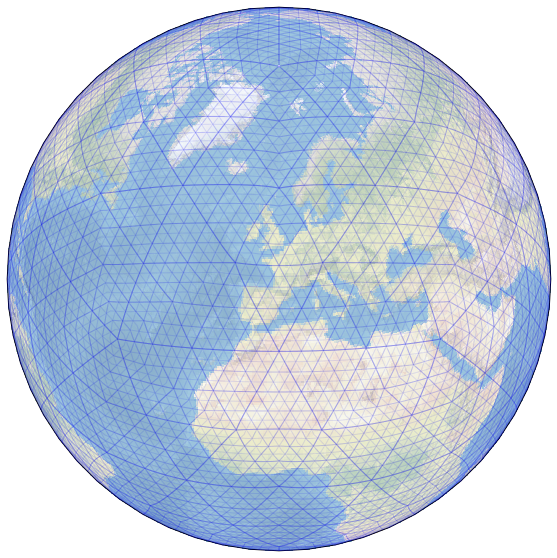

In [3]:
aperture = 4
dggs4t = dg.DgIDGGS4T(net0, geoRF, vert0, azimuth, 10, "ISEA4T","ISEA")
dggs_res = dg.dggetres(aperture,dg.TopologyType.TRIANGLE,dg.ProjectionType.ISEA,maxreslevel)

dggs_df = pd.DataFrame.from_dict(dggs_res, orient='index')
display(dggs_df)

plt.close()
plt.figure(1,figsize=(10,10))
fig = plt.gcf()    

for reslevel , data in dggs_res.items():
    dggs4tres = dggs4t.idgg(reslevel)
    ax = plt.subplot(1 , 1 , 1 , projection=ccrs.NearsidePerspective(central_longitude=0 , central_latitude =45))
    ax.set_global()
    for cell in np.arange(0,int(data['cells'])+1):
        mpoly = mpatches.Polygon(
            xy=dggs4tres.getVertices(cell,density-reslevel), 
            closed=False , 
            facecolor="white",
            edgecolor="blue",
            alpha=0.05,
            animated=True,
            linewidth=1,
            zorder=reslevel,
            transform=ccrs.Geodetic())            
        ax.add_patch(mpoly)            
ax.stock_img()
plt.savefig('image/ISEA4T.png')
plt.show()  

,area_km,cells,cls_km,res,spacing_km
0,5.100656e+07,12.0,8199.500370,0.0,7053.652431
1,1.700219e+07,32.0,4678.969872,1.0,4072.428130
2,5.667396e+06,92.0,2691.252071,2.0,2351.217477
3,1.889132e+06,272.0,1551.867549,3.0,1357.476043
4,6.297106e+05,812.0,895.601842,4.0,783.739159
5,2.099035e+05,2432.0,517.004997,5.0,452.492014


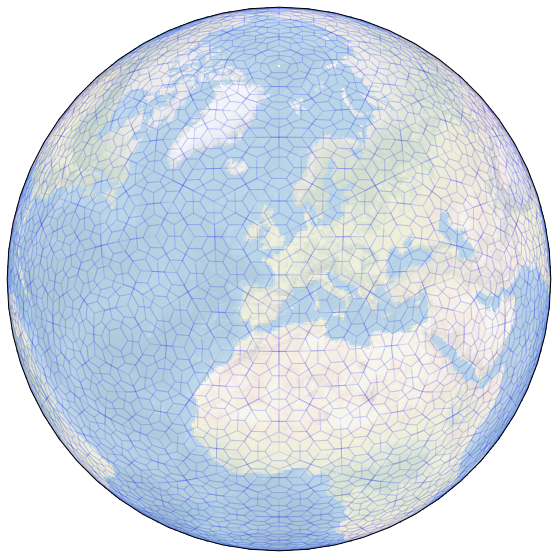

In [2]:
aperture = 3
net0 = dg.DgRFNetwork()
geoRF = dg.DgGeoSphRF(net0, "GS0");
vert0 = dg.DgGeoCoord(0, 90, False)
azimuth = 0.0
dggs3h = dg.DgIDGGS43H(net0, geoRF, vert0, azimuth, 10, "FULLER3H","FULLER")
dggs_res = dg.dggetres(aperture,dg.TopologyType.HEXAGON,dg.ProjectionType.FULLER,maxreslevel)

dggs_df = pd.DataFrame.from_dict(dggs_res, orient='index')
display(dggs_df)

plt.close()
plt.figure(1,figsize=(10,10))
fig = plt.gcf()    

for reslevel , data in dggs_res.items():
    dggs3hres = dggs3h.idgg(reslevel)
    ax = plt.subplot(1 , 1 , 1 , projection=ccrs.NearsidePerspective(central_longitude=0 , central_latitude =45))
    ax.set_global()
    for cell in np.arange(0,int(data['cells'])+1):
        mpoly = mpatches.Polygon(
            xy=dggs3hres.getVertices(cell,density-reslevel), 
            closed=False , 
            facecolor="white",
            edgecolor="blue",
            alpha=0.1,
            animated=True,
            linewidth=1,
            transform=ccrs.Geodetic())            
        ax.add_patch(mpoly)            
        
ax.stock_img()
plt.savefig('image/FULLER3H.png')
plt.show()   